# Group CW1 - 14

Student Numbers: 23226363, 23131426

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Part I

## 1.1 Linear Regression

For each of the polynomial bases of dimension k = 1, 2, 3, 4 fit the data set of Figure 1
{(1, 3), (2, 2), (3, 0), (4, 5)}.

In [3]:
# provided dataset
xvals = np.array([1,2,3,4])
yvals = np.array([3,2,0,5])

In [4]:
def fit_weights(order, trainx, trainy):
    """
     Fit k - basis weights to training data.
     Args:
     	 order: dimension of basis to fit - same as k
     	 trainx: array of shape n_samples - input
     	 trainy: array of shape n_samples - output/target variables to be fitted
     Returns: 
     	 fitted weights of the model
    """
    n_samples = trainx.shape[0]
    basis_matrix =  np.array([trainx**i for i in range(order)]).transpose()
    X_k = basis_matrix
    # w = (X.T @ X)^-1 @ X.T @ y
    W_k = np.linalg.pinv(X_k.T @ X_k) @ X_k.T @ trainy  
    return W_k 

def predict_from_model(order,model_weights, xvals):
    # y_pred = W_k @ X_k.T
    # plotk4 = lambda x: np.dot(W_4, np.array([1, x, x**2, x**3]))
    # vectorized_k4 = np.vectorize(plotk4)   #yval = vectorized_k4(x_vector)
    return np.dot(model_weights, np.array([xvals**i for i in range(order)]))

In [7]:
# Verifying the equation given in question
k = 4
weights = fit_weights(k, xvals, yvals)
y_pred = predict_from_model(k,weights,xvals)
print(weights, y_pred)

[-5.         15.16666667 -8.5         1.33333333] [3.00000000e+00 2.00000000e+00 2.74580358e-12 5.00000000e+00]


In [5]:
w_all = [fit_weights(k, xvals, yvals) for k in range(1,5)]

Text(0, 0.5, 'y')

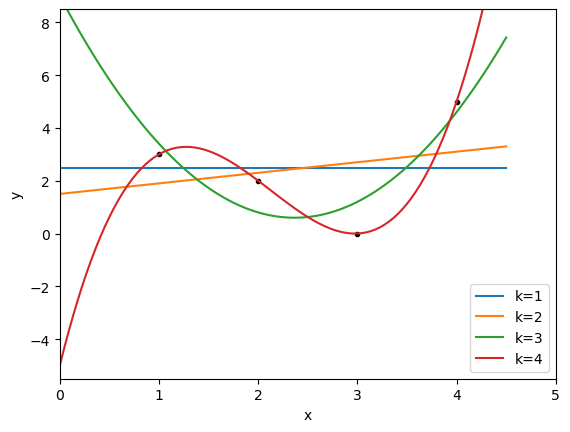

In [6]:
plt.plot(xvals,yvals,'k.')

x_vector = np.linspace(0, 4.5, 100)
y_pred = [predict_from_model(k,w_all[k-1],x_vector) for k in range(1,5)]

plt.plot(x_vector, y_pred[0],label='k=1')
plt.plot(x_vector, y_pred[1],label='k=2')
plt.plot(x_vector, y_pred[2],label='k=3')
plt.plot(x_vector, y_pred[3],label='k=4')

plt.legend()
plt.xlim((0,5))
plt.ylim((-5.5,8.5))
# plt.axhline(y=0, color='k', linestyle='-')
plt.xlabel('x')
plt.ylabel('y')

### 1 b: Print the polynomial

In [8]:
# Print the polynomial
print('k=1: ',np.poly1d(w_all[0]))
print('k=2: ',np.poly1d(w_all[1]))
print('k=3: ',np.poly1d(w_all[2]))
print('k=4: ',np.poly1d(w_all[3]))

k=1:   
2.5
k=2:   
1.5 x + 0.4
k=3:     2
9 x - 7.1 x + 1.5
k=4:      3         2
-5 x + 15.17 x - 8.5 x + 1.333


### 1c: MSE
MSE = SSE/m

In [32]:
y_preds = np.array([predict_from_model(k,w_all[k-1], xvals) for k in range(1,5)])

y_true = yvals
SSE = np.sum((y_preds-y_true)**2,-1)
MSE= SSE/len(y_true)
print(MSE)

[3.25000000e+00 3.05000000e+00 8.00000000e-01 2.30047602e-23]


##  Problem 2

In [33]:
def random_function_g(x):
    """
     Generate a value based on sine function + noise
     Args:
     	 x: input value
     Returns: 
     	 target variable
    """
    sine_term = np.sin(2*np.pi*x) **2
    epsilon = np.random.normal(0, 0.07)
    return sine_term + epsilon

# vectorizing over above function
g_vectorized = np.vectorize(random_function_g) 

def sample_data(npoints):
    """
     Samples data of length npoints
     Args:
     	 npoints: Number of points to sample
     Returns: 
     	 set of input variables and noisy targets
    """
    x_i = np.random.random(npoints) # samples x_i uniformly at random from [0,1]
    y_i = g_vectorized(x_i)
    dataset = np.array([x_i,y_i]).transpose()
    return dataset

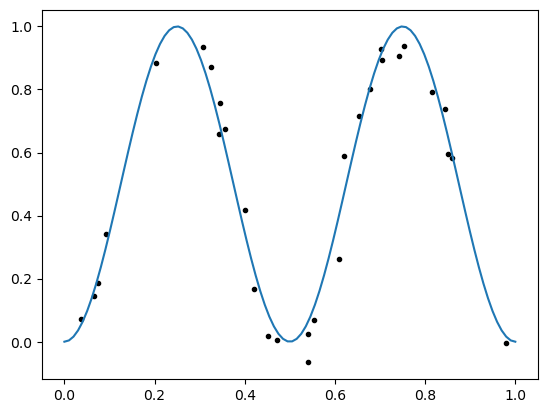

In [34]:
# sample 30 values and plots sin^2 (2*pi*x) with dataset superimposed
training_set = sample_data(30)
trainx = training_set[:,0]
trainy = training_set[:,1]

x_range = np.linspace(0, 1, 100)
func_y = np.sin(2*np.pi*x_range) **2

plt.plot(trainx,trainy,'k.')
plt.plot(x_range,func_y)

In [35]:
def fit_weights(order, trainx, trainy):
    """
     Fit k - basis weights to training data.
     Args:
     	 order: dimension of basis to fit - same as k
     	 trainx: array of shape n_samples - input
     	 trainy: array of shape n_samples - output variables to be fitted
     Returns: 
     	 fitted weights of the model
    """
    n_samples = trainx.shape[0]
    basis_matrix =  np.array([trainx**i for i in range(order)]).transpose()
    X_k = basis_matrix
    # w = (X.T @ X)^-1 @ X.T @ y
    W_k = np.linalg.pinv(X_k.T @ X_k) @ X_k.T @ trainy  
    return W_k 

def predict_from_model(order,model_weights, xvals):
    # y_pred = W_k @ X_k.T
    return np.dot(model_weights, np.array([xvals**i for i in range(order)]))

Text(0, 0.5, 'y fitted')

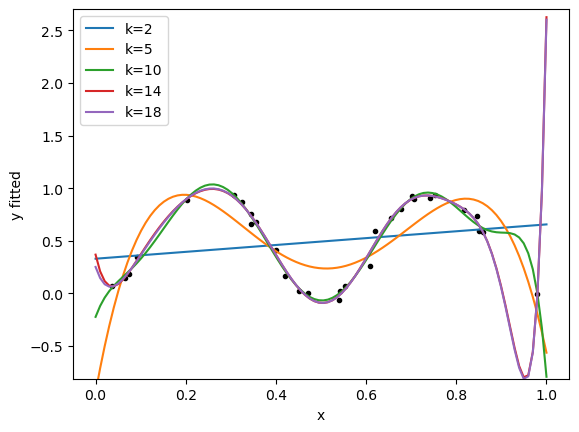

In [36]:
# Fitting to polynomial basis of dimension k
weights_dict = {}
orders = [2, 5, 10, 14, 18]
for order in orders:
    weights_dict[order] = fit_weights(order,trainx,trainy) 
    
# plot original training_set points
plt.plot(trainx,trainy,'k.')

x_range = np.linspace(0, 1, 100)
# plot curves of 5 fits
for order in orders:
    y_fitted = predict_from_model(order,weights_dict[order], x_range)
    plt.plot(x_range, y_fitted, label=f'k={order}')
plt.legend()

plt.ylim((min(y_fitted),max(y_fitted)+0.1))
plt.xlabel('x')
plt.ylabel('y fitted')

In [37]:
def compute_mse(y_true, y_pred):
    # mean square error
    return np.sum((y_true-y_pred)**2) / len(y_true)

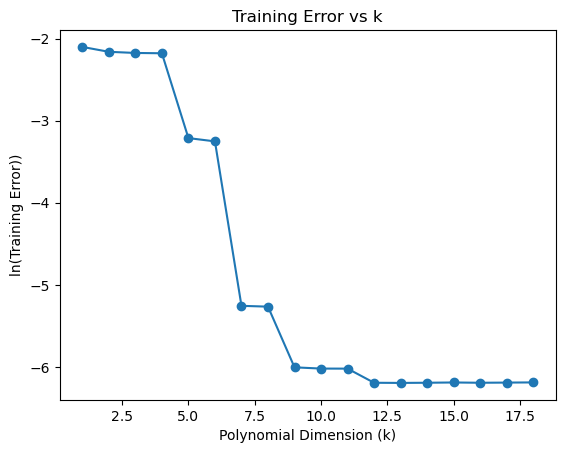

In [38]:
# 2b) ln(Training Error) vs Polynomial Dimension
orders = np.arange(1,18+1)
weights_dict = {}
train_pred_y = {}
trainingErrors = []
for order in orders:
    weights_dict[order] = fit_weights(order,trainx,trainy)
    train_pred_y[order] = predict_from_model(order,weights_dict[order], trainx)
    trainingErrors.append(np.log(compute_mse(trainy, train_pred_y[order])))
    
plt.plot(range(1, 19), trainingErrors, marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Training Error))')
plt.title('Training Error vs k')
plt.show()

### 2 c) Overfitting on test set

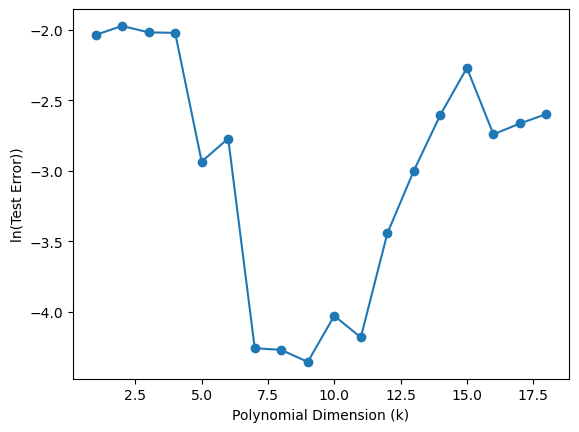

In [39]:
# 2c) Generate test set and show overfitting 
test_set = sample_data(1000)
test_x = test_set[:,0]
test_y = test_set[:,1]

orders = np.arange(1,18+1)
test_pred = {}
testErrors = []
for order in orders:
    test_pred[order] = predict_from_model(order, weights_dict[order], test_x)
    testErrors.append(np.log(compute_mse(test_y, test_pred[order])))

plt.plot(range(1, 19), testErrors, marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Test Error))')
# plt.title('ln(Test Error) vs Polynomial Dimension')
plt.show()

In [40]:
# 2 d) Get average of 100 runs - smoothing of training and test curves 
orders = np.arange(1,18+1)

trainingErrors = {}
testErrors = {}
for repeat in range(100):
    # sample train and test data
    training_set = sample_data(30)
    trainx = training_set[:,0]
    trainy = training_set[:,1]
    test_set = sample_data(1000)
    test_x = test_set[:,0]
    test_y = test_set[:,1]

    weights_dict = {}
    train_pred_y = {}
    for order in orders:
        if order not in trainingErrors:
            trainingErrors[order] = []
            testErrors[order] = []

        # Fit the model on train data
        model_weights = fit_weights(order,trainx,trainy)
        # Compute training errors
        train_pred_y[order] = predict_from_model(order, model_weights, trainx)
        trainingErrors[order].append(compute_mse(trainy, train_pred_y[order])) 
        # Compute test errors
        test_pred[order] = predict_from_model(order, model_weights, test_x)
        testErrors[order].append(compute_mse(test_y, test_pred[order]))

for order in orders:
    trainingErrors[order] = np.log(np.average(trainingErrors[order]))
    testErrors[order] = np.log(np.average(testErrors[order]))

trainingErrors_logavg = list(trainingErrors.values())
testErrors_logavg = list(testErrors.values())

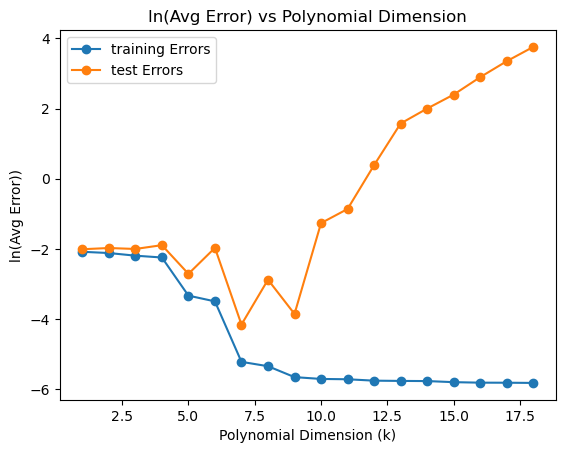

In [41]:
# ln(Training / Test Error) vs Polynomial Dimension
plt.plot(range(1, 19), trainingErrors_logavg, marker='o',label='training Errors')
plt.plot(range(1, 19), testErrors_logavg, marker='o',label='test Errors')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Avg Error))')
plt.title('ln(Avg Error) vs Polynomial Dimension')
plt.legend()
plt.show()


## Problem 3

(for k = 1, . . . , 18) 

Basis {sin(1πx), sin(2πx), sin(3πx), . . . , sin(kπx)}

In [42]:
def fit_weights_sinebasis(order, trainx, trainy):
    """
     Fit weights for the basis specified. 
     Args:
     	 order: order k
     	 trainx: training data used to fit the basis matrix
     	 trainy: training labels used to fit the basis matrix
     Returns: 
     	 weight matrix w
    """
    n_samples = trainx.shape[0]
    basis_matrix =  np.array([np.sin(np.pi*trainx*i) for i in range(1,order+1)]).transpose()
    X_k = basis_matrix
    W_k = np.linalg.pinv(X_k.T @ X_k) @ X_k.T @ trainy  # w = (X.T @ X)^-1 @ X.T @ y
    return W_k

def predict_from_sinemodel(order, model_weights, xvals):
    """
     Predict data from fitted model.      
     Args:
     	 model_weights: Fitted weights
     	 xvals: Values for which label is to be predicted
    """
    # y_pred = W_k @ X_k.T
    return np.dot(model_weights, np.array([np.sin(np.pi*xvals*i) for i in range(1,order+1)]))

In [43]:
# Generate training set
training_set = sample_data(30)
trainx = training_set[:,0]
trainy = training_set[:,1]

orders = np.arange(1,18+1)
# Fitting
weights_dict = {}
for order in orders:
    weights_dict[order] = fit_weights_sinebasis(order,trainx,trainy)

In [ ]:
# # # Just for viz
# plt.plot(trainx,trainy,'k.')
# x_range = np.linspace(0, 1, 100)
# for order in orders:
#     y_fitted = predict_from_sinemodel(order, weights_dict[order], x_range)
#     plt.plot(x_range, y_fitted, label=f'k={order}')
# plt.legend()

# # plt.ylim((-2,2))


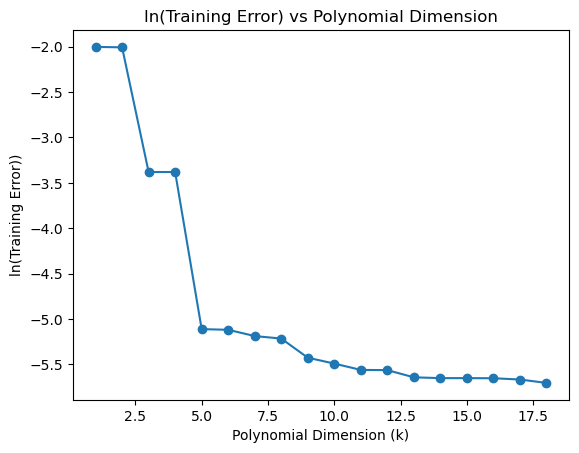

In [45]:
# ln(Training Error) vs Polynomial Dimension
orders = np.arange(1,18+1)
weights_dict = {}
train_pred_y = {}
trainingErrors = []
for order in orders:
    weights_dict[order] = fit_weights_sinebasis(order,trainx,trainy)
    train_pred_y[order] = predict_from_sinemodel(order, weights_dict[order], trainx)
    trainingErrors.append(np.log(compute_mse(trainy, train_pred_y[order])))
    
plt.plot(range(1, 19), trainingErrors, marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Training Error))')
plt.title('ln(Training Error) vs Polynomial Dimension')
plt.show()

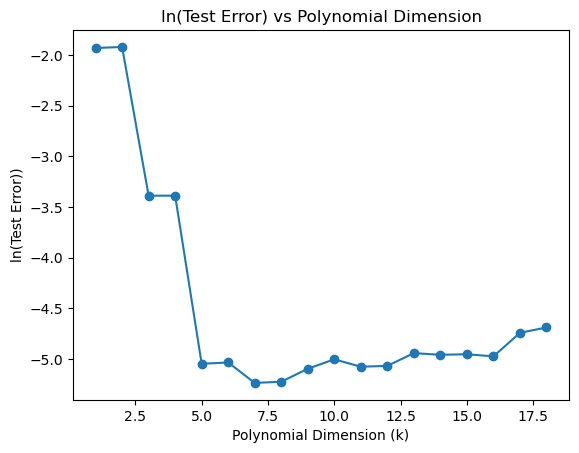

In [46]:
# Generate test set and see fitting with various dimensions
test_set = sample_data(1000)
test_x = test_set[:,0]
test_y = test_set[:,1]

orders = np.arange(1,18+1)
test_pred = {}
testErrors = []
for order in orders:
    test_pred[order] = predict_from_sinemodel(order, weights_dict[order], test_x)
    testErrors.append(np.log(compute_mse(test_y, test_pred[order])))
    
plt.plot(range(1, 19), testErrors, marker='o')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Test Error))')
plt.title('ln(Test Error) vs Polynomial Dimension')
plt.show()

In [47]:
# d) repetition over 100 trials
orders = np.arange(1,18+1)

trainingErrors = {}
testErrors = {}
for repeat in range(100):
    # sample train and test data
    training_set = sample_data(30)
    trainx = training_set[:,0]
    trainy = training_set[:,1]
    test_set = sample_data(1000)
    test_x = test_set[:,0]
    test_y = test_set[:,1]

    weights_dict = {}
    train_pred_y = {}
    for order in orders:
        if order not in trainingErrors:
            trainingErrors[order] = []
            testErrors[order] = []
        # Fit the model on train data
        weights_dict[order] = fit_weights_sinebasis(order,trainx,trainy)
        # Predict and compute training errors
        train_pred_y[order] = predict_from_sinemodel(order, weights_dict[order], trainx)
        trainingErrors[order].append(compute_mse(trainy, train_pred_y[order])) 
        # Predict and compute test errors
        test_pred[order] = predict_from_sinemodel(order, weights_dict[order], test_x)
        testErrors[order].append(compute_mse(test_y, test_pred[order]))

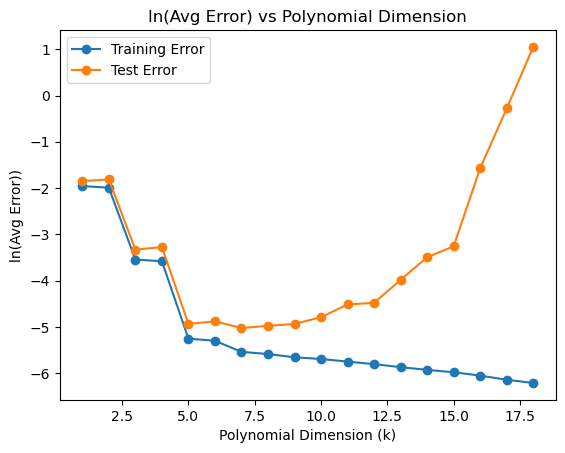

In [48]:
for order in orders:
    trainingErrors[order] = np.log(np.average(trainingErrors[order]))
    testErrors[order] = np.log(np.average(testErrors[order]))
    
trainingErrors_logavg = list(trainingErrors.values())
testErrors_logavg = list(testErrors.values())

plt.plot(range(1, 19), trainingErrors_logavg, marker='o', label='Training Error')
plt.plot(range(1, 19), testErrors_logavg, marker='o', label='Test Error')
plt.xlabel('Polynomial Dimension (k)')
plt.ylabel('ln(Avg Error))')
plt.title('ln(Avg Error) vs Polynomial Dimension')
plt.legend()
plt.show()
